**The Dataset is about bank customers churning and can be found on Kaggle:**   
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

**Disclaimer: The dataset above is simulated**

## Load the Data

In [2]:
# Load the required libraries for data manipulation and data visualization 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# Load the dataset from local directory into a Pandas dataframe called 'df'
df = pd.read_csv('Churn_Modelling.csv', index_col=None)

In [4]:
# View the shape of the data using .shape
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


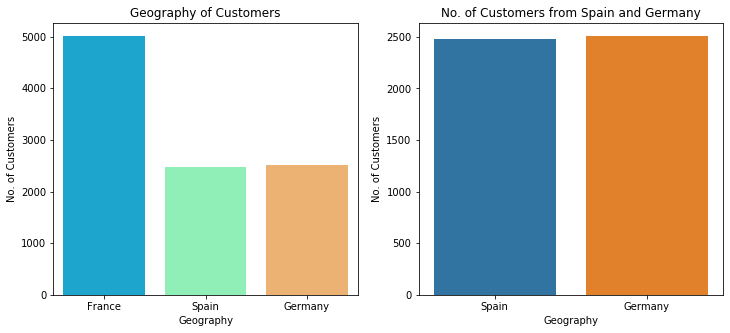

In [20]:
# Customer breakdown by Geography


fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.countplot(df['Geography'], ax=axs[0],palette='rainbow')
axs[0].set_xlabel('Geography')
axs[0].set_ylabel('No. of Customers')
axs[0].set_title('Geography of Customers')

sns.countplot(df[(df['Geography'] == 'Spain') | (df['Geography'] == 'Germany')]['Geography'], ax= axs[1])#, #palette='glow")
axs[1].set_xlabel('Geography')
axs[1].set_ylabel('No. of Customers')
axs[1].set_title('No. of Customers from Spain and Germany')

plt.show()

**The plots above show the count of Customers from France, Spain and Germany. 
The plot shows that there are twice as many customers from France than from Spain or Germany.**

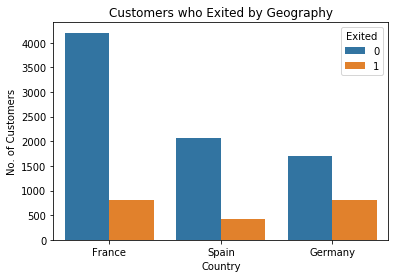

In [21]:
# Customers who exited by geography
sns.countplot(df['Geography'], hue=df['Exited'])
plt.xlabel('Country')
plt.ylabel('No. of Customers')
plt.title('Customers who Exited by Geography')
plt.show()

**The plot shows the breakdown of customers who exited from each country. We can see Germany had the most customers who exited followed by France and Spain.**

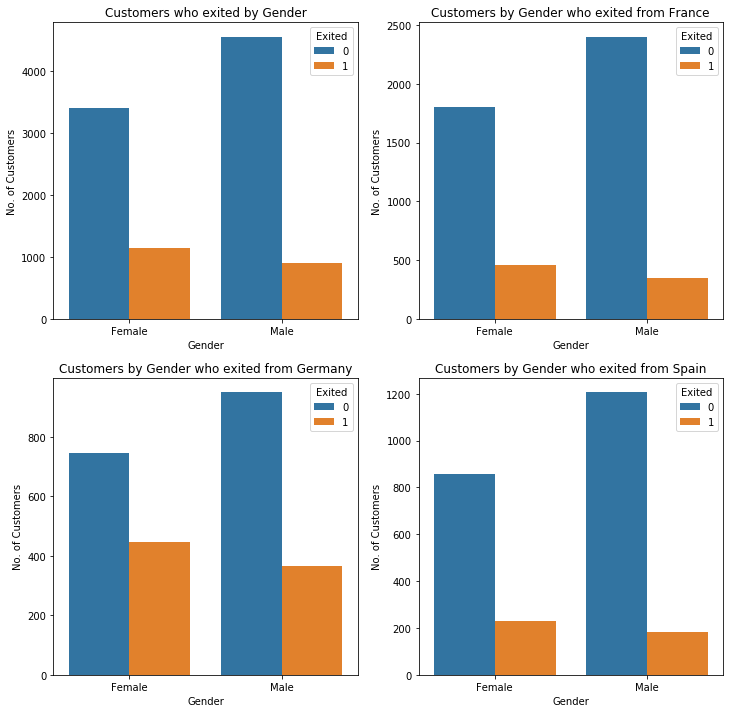

In [22]:
# Customers who exited by Gender and Geography

fig, axs = plt.subplots(2, 2, figsize=(12,12))

sns.countplot(df['Gender'], hue=df['Exited'],ax = axs[0,0])
axs[0,0].set_title('Customers who exited by Gender')
axs[0,0].set_xlabel('Gender')
axs[0,0].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 'France']['Gender'], hue=df['Exited'],ax=axs[0,1])
axs[0,1].set_title('Customers by Gender who exited from France')
axs[0,1].set_xlabel('Gender')
axs[0,1].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 'Germany']['Gender'], hue=df['Exited'], ax=axs[1,0])
axs[1,0].set_title('Customers by Gender who exited from Germany')
axs[1,0].set_xlabel('Gender')
axs[1,0].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 'Spain']['Gender'], hue=df['Exited'], ax=axs[1,1])
axs[1,1].set_title('Customers by Gender who exited from Spain')
axs[1,1].set_xlabel('Gender')
axs[1,1].set_ylabel('No. of Customers')

plt.show()

**The first plot shows the breakdown of customers who exited by their gender and the rest of the plots look at customers by gender who exited from France, Germany and Spain.**

**From these plots, we can see that there were a higher number of female customers who exited, France had the highest number of female customers who exited the bank and Germany had the highest number of Male customers who exited the bank.** 

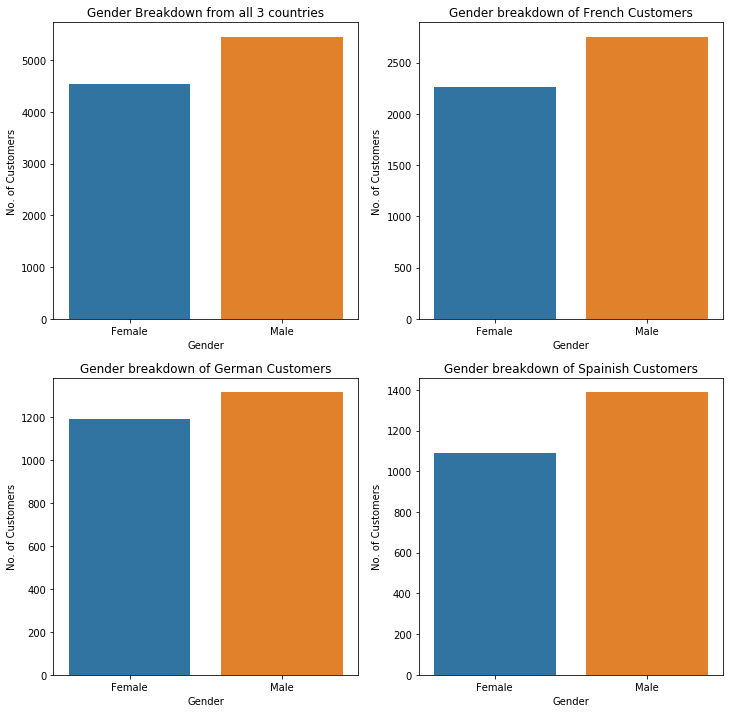

In [24]:
# Breakdown of gender by country? 

fig, axs = plt.subplots(2, 2, figsize=(12,12))

sns.countplot(df['Gender'], ax = axs[0,0])
axs[0,0].set_title('Gender Breakdown from all 3 countries')
axs[0,0].set_xlabel('Gender')
axs[0,0].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 'France']['Gender'], ax=axs[0,1])
axs[0,1].set_title('Gender breakdown of French Customers')
axs[0,1].set_xlabel('Gender')
axs[0,1].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 'Germany']['Gender'], ax=axs[1,0])
axs[1,0].set_title('Gender breakdown of German Customers')
axs[1,0].set_xlabel('Gender')
axs[1,0].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 'Spain']['Gender'], ax=axs[1,1])
axs[1,1].set_title('Gender breakdown of Spainish Customers')
axs[1,1].set_xlabel('Gender')
axs[1,1].set_ylabel('No. of Customers')

plt.show()

**The plots above looks at the gender breakdown of all customers and customers from each country. We can see that France has the highest female and male customers**

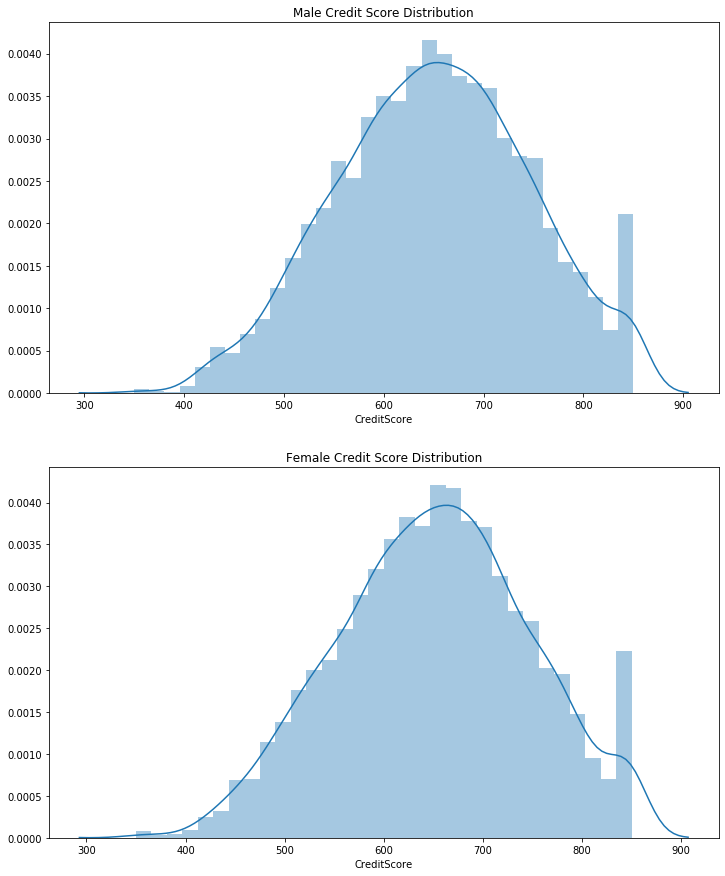

In [10]:
#Distribution of credit score by gender? 

fig, axs = plt.subplots(2, figsize=(12,15))

sns.distplot(df[df['Gender'] == 'Male']['CreditScore'], ax=axs[0])
axs[0].set_title('Male Credit Score Distribution')

sns.distplot(df[df['Gender'] == 'Female']['CreditScore'], ax=axs[1])
axs[1].set_title('Female Credit Score Distribution')

plt.show()

**The plots above look at the credit score distribution of female and male customers. There is no significant difference in the distribution of both gender's credit scores**

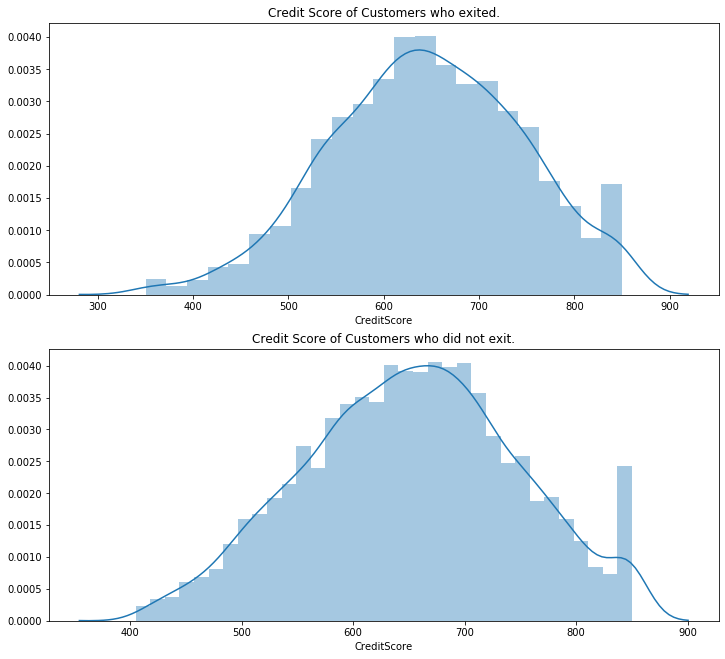

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(12,11))

sns.distplot(df[df['Exited'] == 1]['CreditScore'], ax=axs[0])
axs[0].set_title('Credit Score of Customers who exited.')

sns.distplot(df[df['Exited'] == 0]['CreditScore'], ax=axs[1])
axs[1].set_title('Credit Score of Customers who did not exit.')

plt.show()

**The plots above show the credit score distribution of customers who exited and did not exit. Customers who exited had a roughly lower average credit score.**

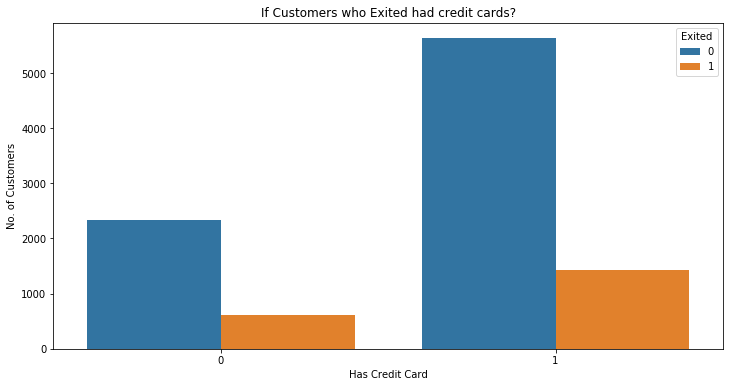

In [25]:
# Customers who exited by Gender 

plt.figure(figsize=(12,6))

sns.countplot(df['HasCrCard'], hue=df['Exited'])
plt.title('If Customers who Exited had credit cards?')
plt.xlabel('Has Credit Card')
plt.ylabel('No. of Customers')

plt.show()

**The plot shows whether customers had a credit card and if they exited. Customers who had a credit card exited more than customers who did not possess a credit card** 

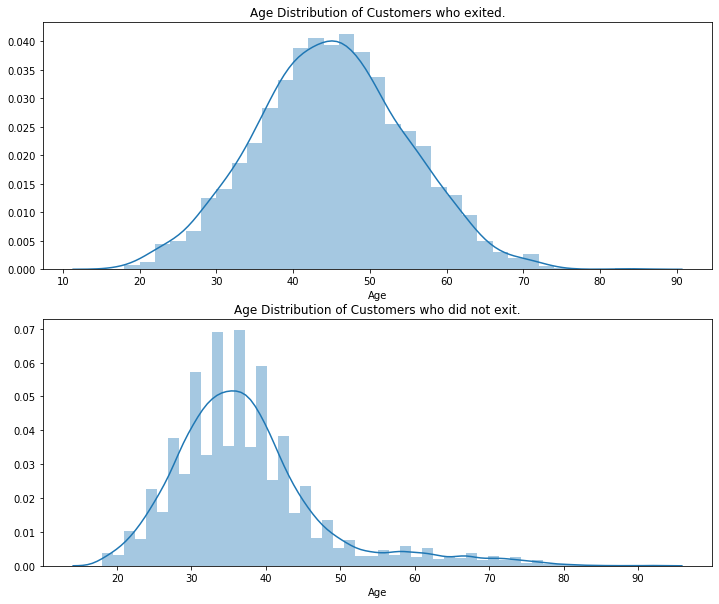

In [13]:
# Customers who exited by Gender 

fig, axs = plt.subplots(2,1, figsize=(12,10))

sns.distplot(df[df['Exited'] == 1]['Age'], hist=True, kde=True, ax=axs[0])
axs[0].set_title('Age Distribution of Customers who exited.')
                        
sns.distplot(df[df['Exited'] == 0]['Age'], hist=True, kde=True, ax=axs[1])
plt.title('Age Distribution of Customers who did not exit.')

plt.show()

**The plots above show the age distribution of customers who exited and who did not exit. The age distribution of customers who exited looks close to normally distributed while the age distribution of customers who did not exit is positvely skewed.**

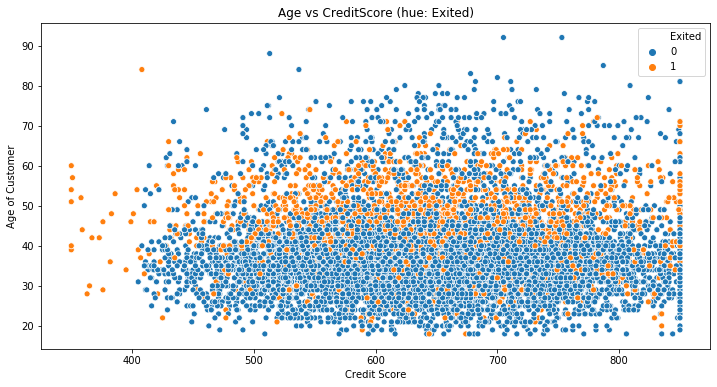

In [26]:
# scatter plot of credit score and age

plt.figure(figsize=(12,6))

sns.scatterplot(df['CreditScore'],df['Age'], hue=df['Exited'])
plt.title('Age vs CreditScore (hue: Exited)')
plt.xlabel('Credit Score')
plt.ylabel('Age of Customer')
plt.show()

**The plot above is a scatterplot of Credit Score and Age with the points color coded by whether customers exited or not. It can be seen that the majority of the people who exited were between 40 and 60 years old**

# Summary

After performing all of those visualizations, we now know more about the dataset and the bank customers. The following points have been ascertained from the data: 

- There are twice as many customers from France than from Spain or Germany
- Germany had the most customers who exited followed by France and Spain
- There were a higher number of female customers who exited, France had the highest number of female customers who exited the bank and Germany had the highest number of Male customers who exited the bank
- France had the highest female and male customers
- There is no significant difference in the distribution of both gender's credit scores
- Customers who exited had a roughly lower average credit score
- Customers who had a credit card exited more than customers who did not possess a credit card
- The age distribution of customers who exited looks close to normally distributed while the age distribution of customers who did not exit is positvely skewed.
- The majority of the people who exited were between 40 and 60 years old

With all of this information, we can ask further questions of the data and explore questions such as: 
1. Why are more female customers leaving the bank? 
2. Are customers with credit cards moving their business to other banks with better rates? 
3. Why are customers in the 40 years - 60 years age range exiting the bank? 
4. Does the bank have a bigger market in France than Spain and Germany based on their customers? 